In [1]:
#1. Importing necessary library & Data loading
#2. Data Cleaning
#3. EDA
#4. Text Preprocessing
#5. Model Building
#6. Evaluation
#7. Improvement
#8. Website
#9. Deploy

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("DataSet.csv")
df.sample(5)

,Label,Content
6415,spam,Subject: adobe + macromedia + os etc all in cd...
6332,spam,Subject: . message report from your contact pa...
1731,ham,Doing project w frens lor.
4912,ham,Love that holiday Monday feeling even if I hav...
2482,ham,K.:)do it at evening da:)urgent:)


In [3]:
df.shape

(11298, 2)

In [4]:
#Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11298 entries, 0 to 11297
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    11298 non-null  object
 1   Content  11298 non-null  object
dtypes: object(2)
memory usage: 176.7+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
df['Label'] = encoder.fit_transform(df['Label'])

In [7]:
df.head()

,Label,Content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Missing Values
df.isnull().sum()

Label      0
Content    0
dtype: int64

In [9]:
#Check for Duplicates Values
df.duplicated().sum()

436

In [10]:
#Remove Duplicates
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(10862, 2)

In [13]:
#EDA
df.head()

,Label,Content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['Label'].value_counts()

Label
0    8841
1    2021
Name: count, dtype: int64

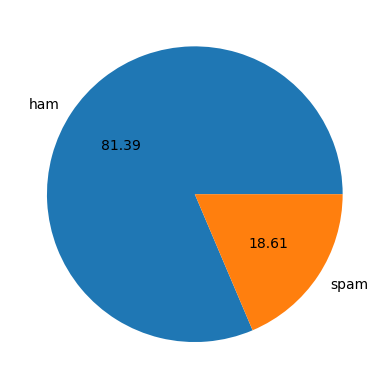

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(), labels=['ham','spam'],autopct="%0.2f" )
plt.show()

In [16]:
import nltk
import string

In [17]:
!pip install nltk

In [18]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Ravindu S
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ravindu S
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
df['Content'].apply(len)

0         111
1          29
2         155
3          49
4          61
         ... 
11293    1189
11294    1167
11295    2131
11296    1060
11297    2331
Name: Content, Length: 10862, dtype: int64

In [20]:
#Number of Charachters
df['Num_Characters'] = df['Content'].apply(len)

In [21]:
df.head()

,Label,Content,Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [76]:
#Number of Words
df['Num_Words'] = df['Content'].apply(lambda x:len(nltk.word_tokenize(x)))

In [77]:
df.head()

,Label,Content,Num_Characters,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [78]:
#Number of Sentences
df['Num_Sentences'] = df['Content'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [79]:
df.head()

,Label,Content,Num_Characters,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [80]:
df[['Num_Characters','Num_Words','Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,10862.000000,10862.000000,10862.000000
mean,846.569140,179.381698,11.085988
std,1549.872973,322.209263,27.188616
min,2.000000,1.000000,1.000000
25%,64.000000,15.000000,2.000000
50%,217.000000,46.000000,4.000000
75%,1036.000000,223.000000,13.000000
max,31055.000000,6350.000000,1565.000000


In [81]:
# For ham content (Email or SMS)
df[df['Label'] == 0][['Num_Characters','Num_Words','Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,8841.000000,8841.000000,8841.000000
mean,826.095012,176.884176,10.571994
std,1442.772100,305.111361,27.795358
min,2.000000,1.000000,1.000000
25%,51.000000,13.000000,1.000000
50%,158.000000,38.000000,3.000000
75%,1093.000000,235.000000,12.000000
max,31055.000000,6350.000000,1565.000000


In [82]:
# For Spam content (Email or SMS)
df[df['Label'] == 1][['Num_Characters','Num_Words','Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,2021.000000,2021.000000,2021.000000
mean,936.134587,190.307274,13.334488
std,1948.354211,388.152573,24.235845
min,13.000000,2.000000,1.000000
25%,156.000000,32.000000,3.000000
50%,412.000000,82.000000,7.000000
75%,925.000000,204.000000,13.000000
max,28432.000000,6131.000000,438.000000


In [83]:
#All details get via histogram plots
import seaborn as sns

<Axes: xlabel='Num_Characters', ylabel='Count'>

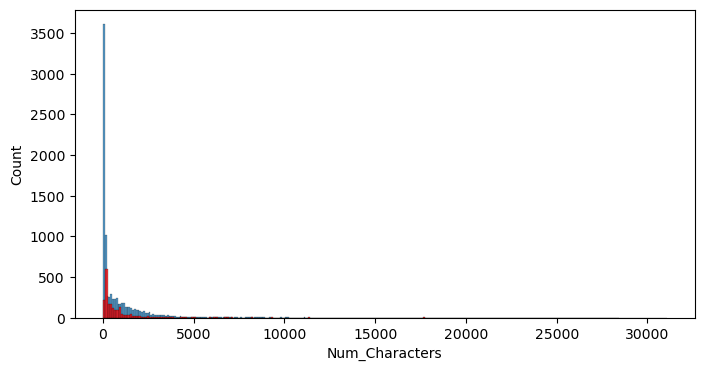

In [84]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Label'] == 0]['Num_Characters'])
sns.histplot(df[df['Label'] == 1]['Num_Characters'],color='red')

<Axes: xlabel='Num_Words', ylabel='Count'>

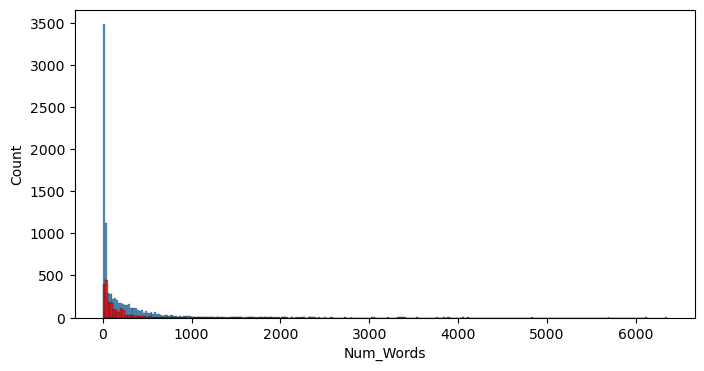

In [85]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Label'] == 0]['Num_Words'])
sns.histplot(df[df['Label'] == 1]['Num_Words'],color='red')

<Axes: xlabel='Num_Sentences', ylabel='Count'>

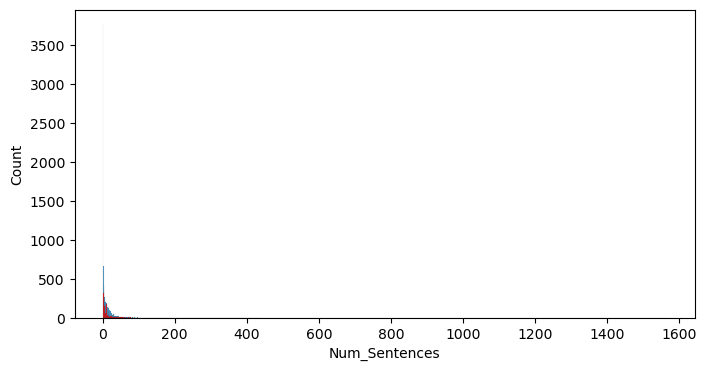

In [86]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Label'] == 0]['Num_Sentences'])
sns.histplot(df[df['Label'] == 1]['Num_Sentences'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


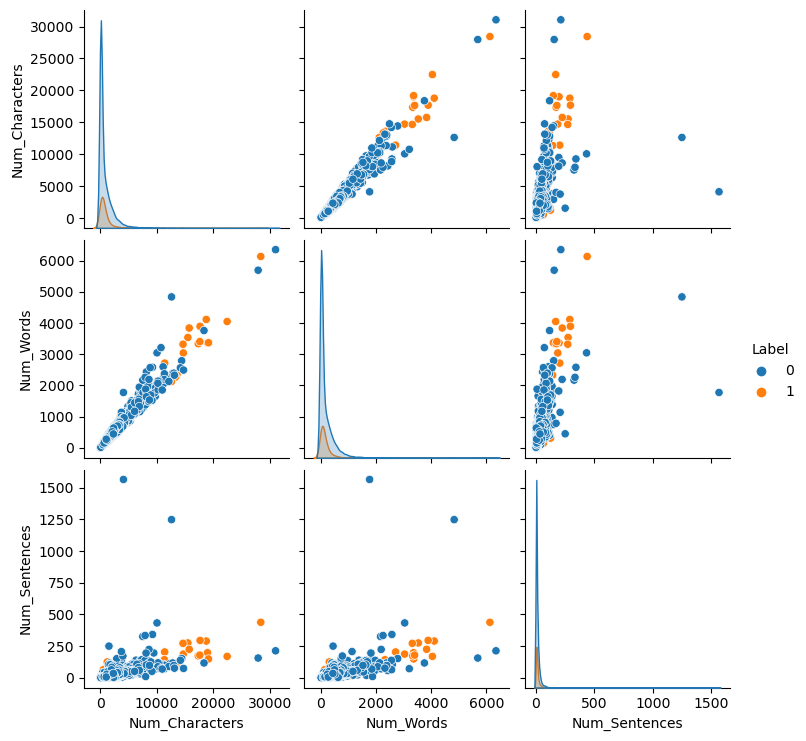

In [87]:
sns.pairplot(df,hue='Label')

In [88]:
#Data Preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [89]:
def transform_text(Content):
    Content = Content.lower() #Lowercase
    Content = nltk.word_tokenize(Content) #Tokenization
    
    y = []
    for i in Content:
        if i.isalnum():
            y.append(i) #Remove special characters
    
    Content = y[:]
    y.clear()
    
    for i in Content:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) #Remove Stopwords
            
    Content = y[:]
    y.clear() 
    
    for i in Content:
        y.append(ps.stem(i)) #Stemming
    
    return " ".join(y)

In [90]:
transform_text("Hi, I'm Ravindu Sachintha,I've passed the exam with 50% marks @$%$&^$")

'hi ravindu sachintha pass exam 50 mark'

In [91]:
df['Transformed_Content'] = df['Content'].apply(transform_text)

In [92]:
df.head()

,Label,Content,Num_Characters,Num_Words,Num_Sentences,Transformed_Content
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [93]:
df['Transformed_Content'][1]

'ok lar joke wif u oni'

In [94]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [97]:
#Model Building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=32400)

In [98]:
X = tfidf.fit_transform(df['Transformed_Content']).toarray()

In [99]:
X.shape

(10862, 32383)

In [100]:
Y = df['Label'].values

In [101]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [104]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [105]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [106]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.7942936033133916
[[1392  393]
 [  54  334]]
0.4594222833562586


In [107]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9088817303267372
[[1784    1]
 [ 197  191]]
0.9947916666666666


In [108]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9153244362632306
[[1754   31]
 [ 153  235]]
0.8834586466165414


In [53]:
#Tfidf using with MultinomialNaiveBayes

In [109]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('Model.pkl','wb'))